In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
raw_data = pd.read_csv('Company_Data.csv')
raw_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#Data Exploration

In [4]:
raw_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
raw_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
raw_data[raw_data.duplicated()].sum()

Sales          0.0
CompPrice      0.0
Income         0.0
Advertising    0.0
Population     0.0
Price          0.0
ShelveLoc      0.0
Age            0.0
Education      0.0
Urban          0.0
US             0.0
dtype: float64

#Data Visualization

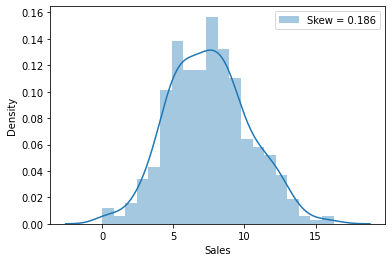

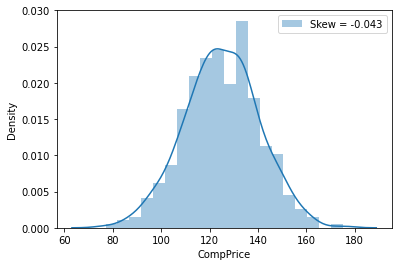

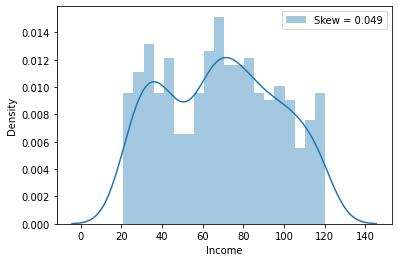

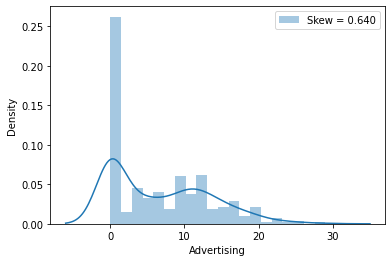

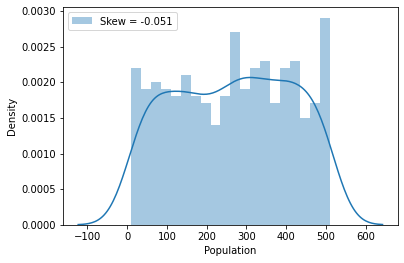

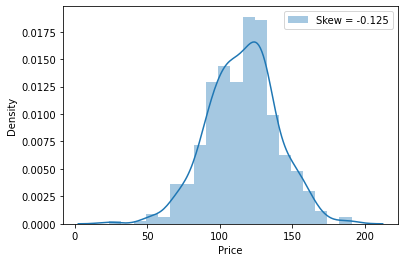

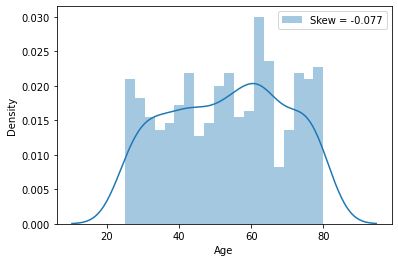

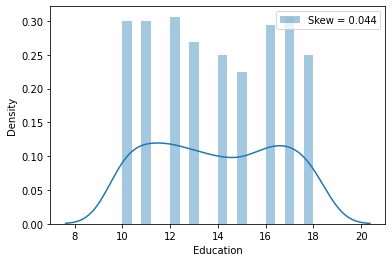

In [8]:
data = raw_data.describe(include=["int64","float64"]).columns
for i in data:
    skew = raw_data[i].skew()
    sns.distplot(raw_data[i], kde= True, label='Skew = %.3f' %(skew), bins=20)
    plt.legend(loc='best')
    plt.show()

#Data Pre-processing

In [9]:
value = raw_data.Sales.max()
value

16.27

In [10]:
# Now lets divide the Sales value into 3 categories (Low, Medium, High)
range = value/3
range

5.423333333333333

In [11]:
print('Low range: 0 to %.6f'%(range),'\nMid range: %.6f'%(range),'to %.6f'%(range*2),'\nHigh range: %.6f'%(range*2),'to %.6f'%(range*3))

Low range: 0 to 5.423333 
Mid range: 5.423333 to 10.846667 
High range: 10.846667 to 16.270000


In [12]:
# Categorize data according to priority (Low, Medium, High)
data = raw_data.copy()
data['Sales_prior'] = pd.cut(x = data['Sales'], bins = [0,5.4,10.8,16.3], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_prior
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [13]:
data.Sales_prior.value_counts()

Medium    248
Low       100
High       52
Name: Sales_prior, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_prior  400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


#Splitting Categorical & Numerical data

In [15]:
categorical_variables = data.describe(include=["object",'category']).columns
categorical_variables

Index(['ShelveLoc', 'Urban', 'US', 'Sales_prior'], dtype='object')

In [16]:
numerical_variables = data.describe(include=["int64","float64"]).columns
numerical_variables

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

#Outliers Detection

In [17]:
from collections import Counter
features = data.columns
df = data.copy()
o = []

def outlier(df):
  outlier_indices = []

  for col in df.columns.tolist():
      Q1 = np.percentile(df[col], 25)
      Q3 = np.percentile(df[col],75)
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      
      outlier_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_col)
      
  outlier_indices = Counter(outlier_indices)        
  outliers = list( k for k, v in outlier_indices.items() if v > 2 )
  o = outliers.copy()

  return outliers  

print("Total of {} outliers detected: ".format(len(o)),o)

Total of 0 outliers detected:  []


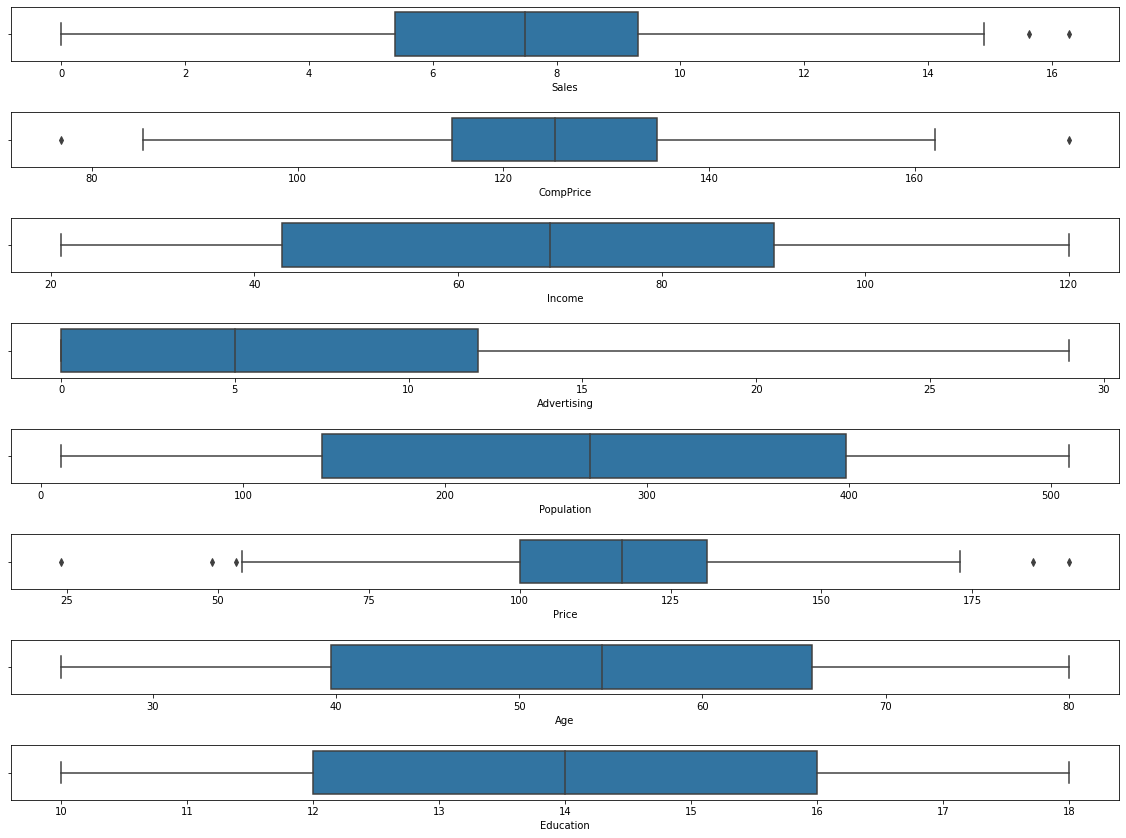

In [18]:
fig, axes=plt.subplots(8,1,figsize=(16,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=df,ax=axes[0])
sns.boxplot(x='CompPrice',data=df,ax=axes[1])
sns.boxplot(x='Income',data=df,ax=axes[2])
sns.boxplot(x='Advertising',data=df,ax=axes[3])
sns.boxplot(x='Population',data=df,ax=axes[4])
sns.boxplot(x='Price',data=df,ax=axes[5])
sns.boxplot(x='Age',data=df,ax=axes[6])
sns.boxplot(x='Education',data=df,ax=axes[7])
plt.tight_layout(pad=2.0)

#Data Visualization

<Figure size 576x576 with 0 Axes>

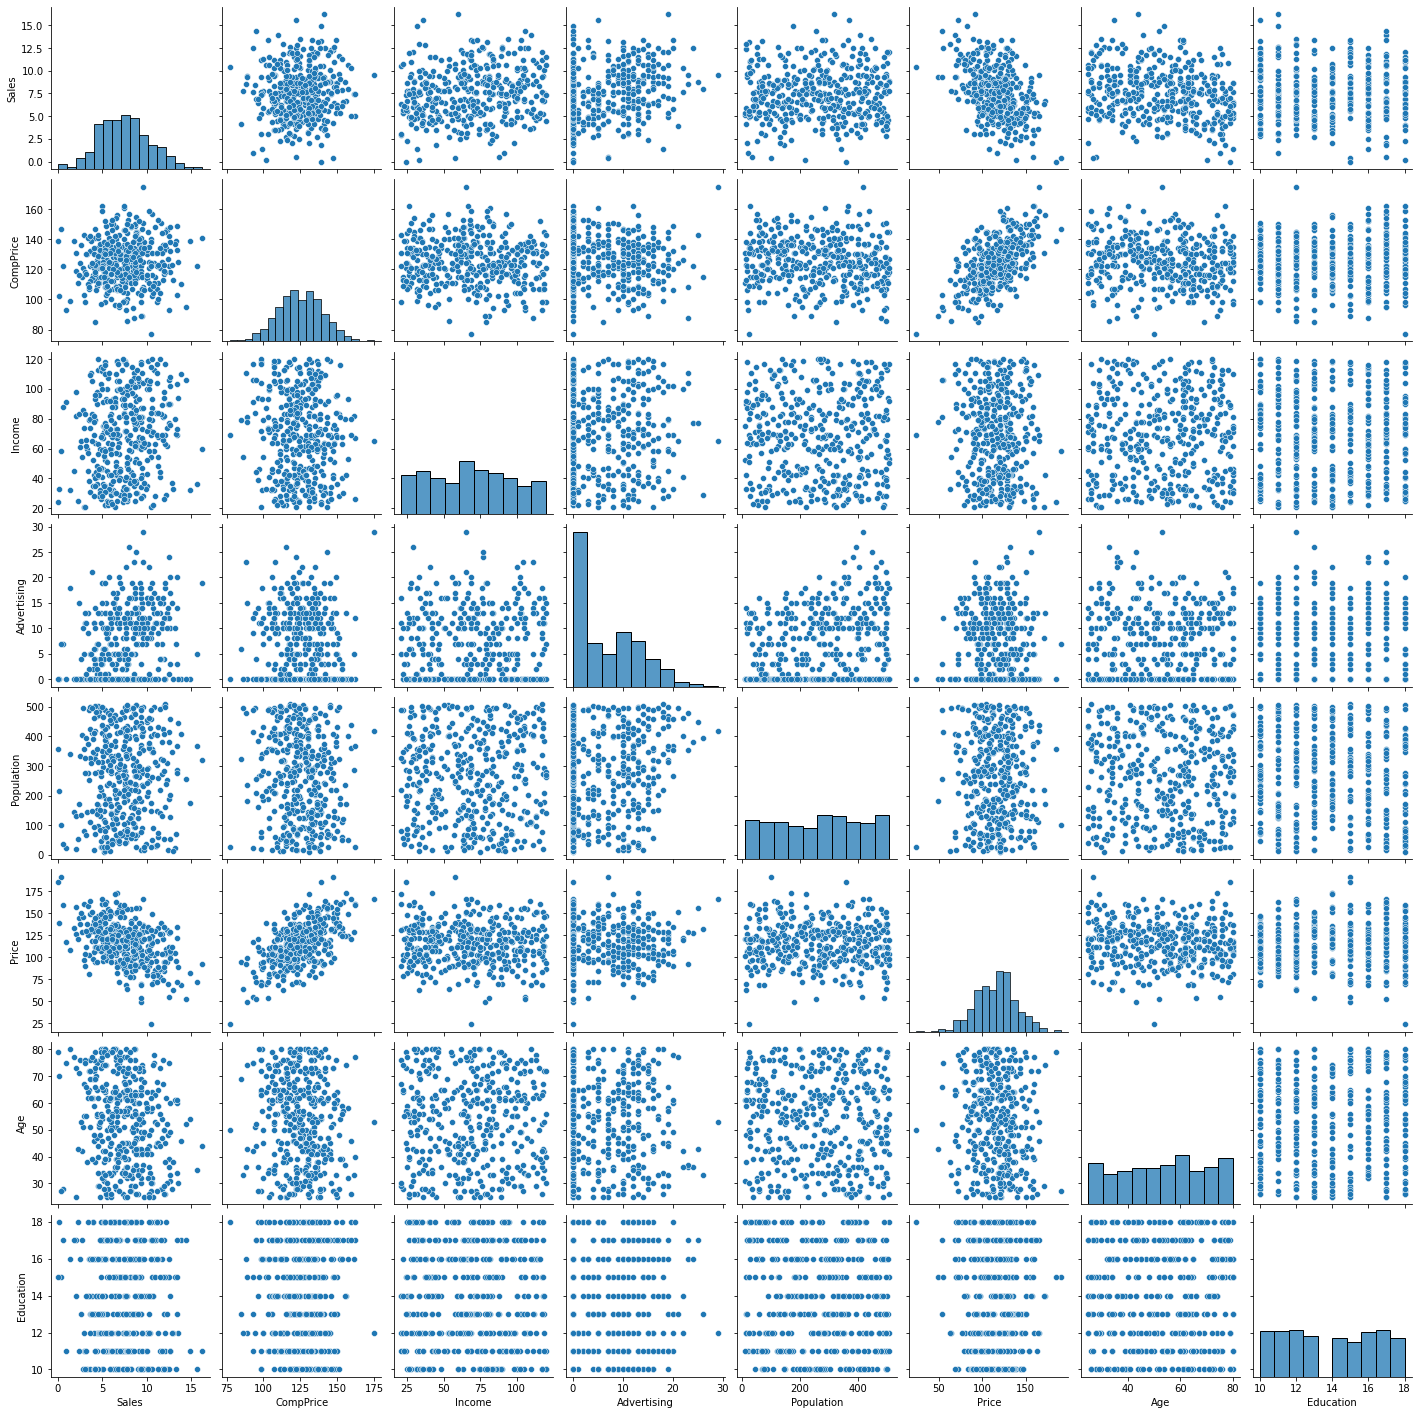

In [19]:
plt.figure(figsize=(8,8))
sns.pairplot(df)
plt.show()

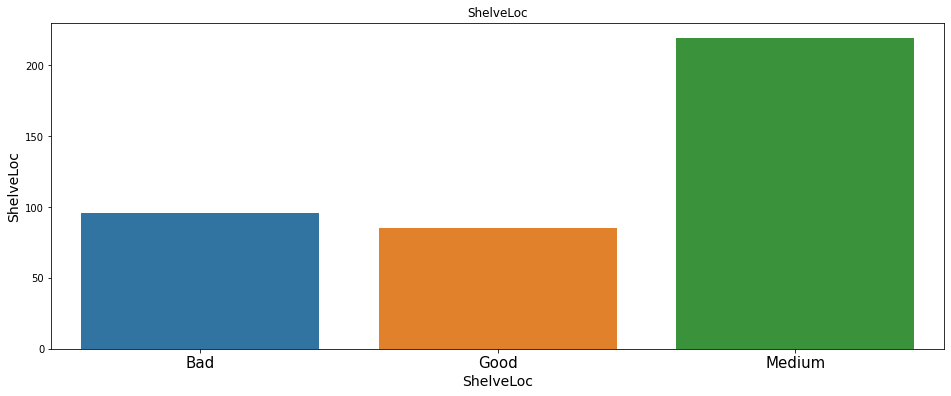

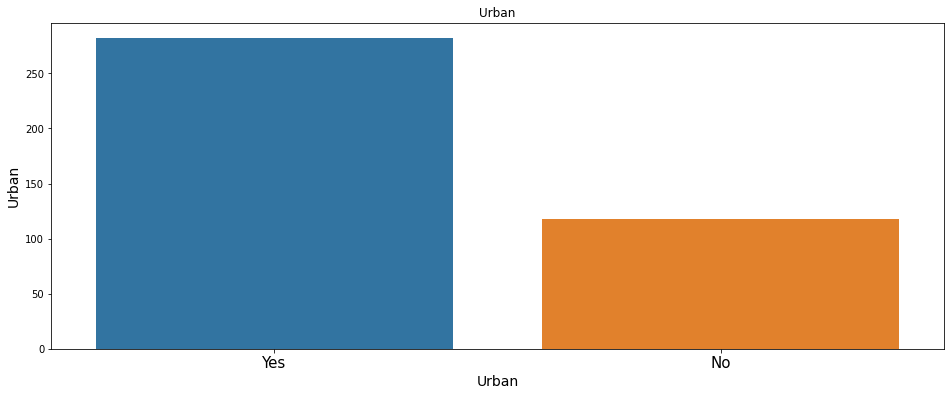

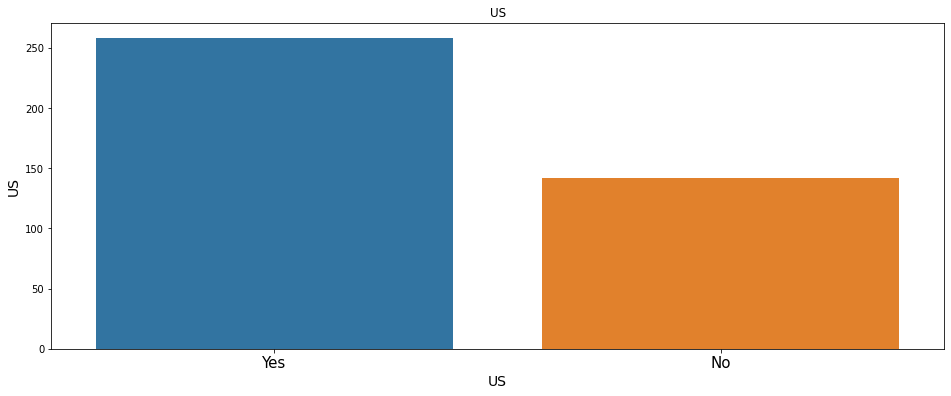

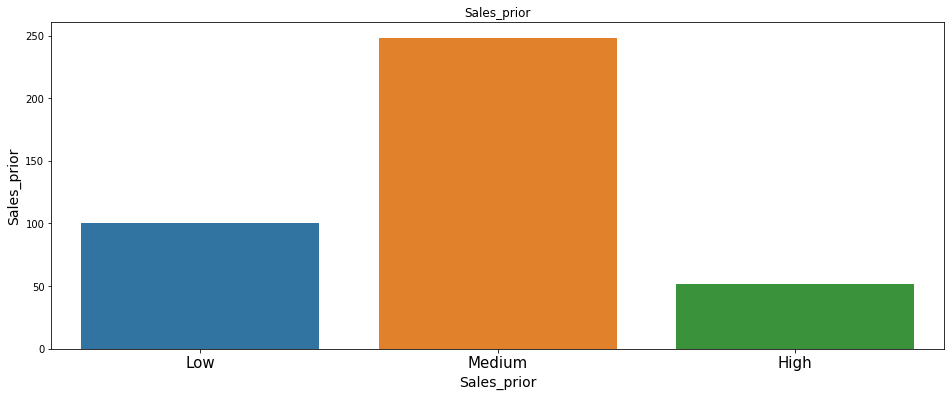

In [20]:
for col in categorical_variables:
    plt.figure(figsize=(16, 6))
    unique = data[col].value_counts(ascending=True);
 
    plt.title(col)
    sns.countplot(data=data, x=col)
    plt.xticks(rotation = 0, size = 15)
    plt.xlabel(col, fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.show()

#Feature Engineering

In [21]:
data1 = data.copy()
data1.drop('Sales',axis=1, inplace =True)
data1 = pd.get_dummies(data1.iloc[:,:-1])
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [22]:
data1['Sales'] = data.Sales_prior
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,Medium
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,Medium
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data1['Sales'])
data1['Sales']=le.transform(data1['Sales'])
data1.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,2
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,2
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


#Splitting data into input (x) and output (y) variables

In [24]:
x = data1.iloc[:, :-1]
y = data1.Sales

In [25]:
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(chi2, k=4)
fit = test.fit(x, y)

In [26]:
scores = fit.scores_
scores

array([2.76526908e+00, 6.64593178e+01, 1.52164206e+02, 1.50914216e+01,
       2.57025522e+02, 9.05284045e+01, 2.28297660e-01, 4.56304280e+01,
       7.92314407e+01, 1.56107618e+01, 1.71804685e-01, 7.18899037e-02,
       7.03002132e+00, 3.86923654e+00])

In [27]:
score_df = pd.DataFrame(list(zip(scores, x.columns)), columns=['Score', 'Feature'])
score_df.sort_values(by='Score', ascending=False, inplace=True)
score_df

,Score,Feature
4,257.025522,Price
2,152.164206,Advertising
5,90.528405,Age
8,79.231441,ShelveLoc_Good
1,66.459318,Income
7,45.630428,ShelveLoc_Bad
9,15.610762,ShelveLoc_Medium
3,15.091422,Population
12,7.030021,US_No
13,3.869237,US_Yes


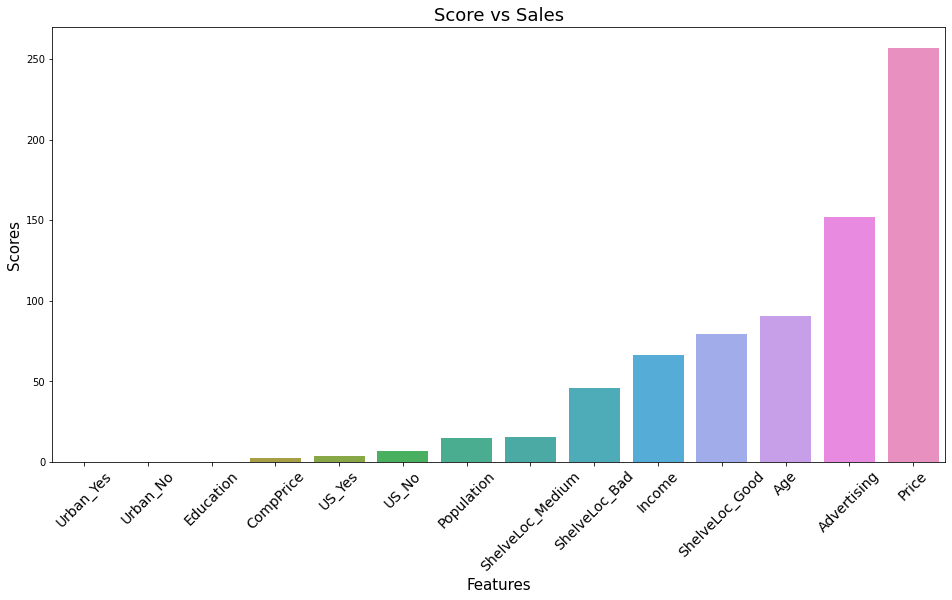

In [28]:
plt.figure(figsize=(16,8))
sns.barplot(x='Feature',y='Score', data=score_df, order=score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.xticks(rotation = 45, fontsize = 14)
plt.title("Score vs Sales", size=18)
plt.show()

In [29]:
model = data1[['Advertising','Population', 'Age', 'Price', 'Income', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model.head()

,Advertising,Population,Age,Price,Income,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,Sales
0,11,276,42,120,73,0,1,0,2
1,16,260,65,83,48,1,0,0,0
2,10,269,59,80,35,0,0,1,2
3,4,466,55,97,100,0,0,1,2
4,3,340,38,128,64,0,1,0,1


In [30]:
x = model.drop('Sales',axis=1)
y = model['Sales']

In [31]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_ix, test_ix in skf.split(x, y):
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 224, 1: 90, 0: 46}) Testing Data Counter({2: 24, 1: 10, 0: 6})


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [33]:
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 174, 1: 70, 0: 36}) Testing Data Counter({2: 74, 1: 30, 0: 16})


In [34]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test:  (120,)


#Decision Tree

In [35]:
!pip install dataprep
from dataprep.eda import plot, plot_correlation, plot_missing, create_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 67.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.4/763.4 KB 57.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 37.

In [36]:
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), 
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], "min_samples_split":[2, 3, 4], "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

tree_dtc = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_dtc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_X, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_dtc = DecisionTreeClassifier(**best_params)
tree_dtc.fit(train_X, train_y)
tree_dtc

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=13)

In [37]:
dtc = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

from sklearn.model_selection import cross_val_score

results = cross_val_score(dtc, train_X, train_y, cv=skf)
print(results.mean())

0.6027777777777777


#Oversampling technique

In [38]:
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.metrics import confusion_matrix

ost = [SMOTE,ADASYN,SMOTETomek,SMOTEENN]

for i in ost:
  counter = Counter(y_train)
  print('\033[1m'+'With {} technique'.format(i)+'\033[0m')
  print('Before',counter)
  teq = i()
  x_train_sm, y_train_sm = teq.fit_resample(x_train, y_train)
  y_pred = tree_dtc.predict(x_test)

  counter = Counter(y_train_sm)
  print('After',counter,'\n')
  print(confusion_matrix(y_test,y_pred),"\n")
  print('Classification Report')
  print('='*60)
  print(classification_report(y_test,y_pred))

With <class 'imblearn.over_sampling._smote.base.SMOTE'> technique
Before Counter({2: 174, 1: 70, 0: 36})
After Counter({0: 174, 2: 174, 1: 174}) 

[[ 6  0 10]
 [ 0 10 20]
 [ 2  5 67]] 

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.67      0.33      0.44        30
           2       0.69      0.91      0.78        74

    accuracy                           0.69       120
   macro avg       0.70      0.54      0.58       120
weighted avg       0.69      0.69      0.66       120

With <class 'imblearn.over_sampling._adasyn.ADASYN'> technique
Before Counter({2: 174, 1: 70, 0: 36})
After Counter({0: 183, 2: 174, 1: 172}) 

[[ 6  0 10]
 [ 0 10 20]
 [ 2  5 67]] 

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.38      0.50        16
           1       0.67      0.33      0.44        30
           2       0.69      0.91      0.78

When we compare results, SMOTE-TOMEK Hybridization technique gave the best results.

**Hence, we are going to use SMOTE-TOMEK for further analysis.**

In [39]:
# SMOTE-TOMEK Technique
counter = Counter(y)
print('Before',counter)
# Oversampling the train dataset using SMOTE + Tomek
smtomek = SMOTETomek(random_state=0)
x_train_smtomek, y_train_smtomek = smtomek.fit_resample(x, y)

counter = Counter(y_train_smtomek)
print('After',counter)

Before Counter({2: 248, 1: 100, 0: 52})
After Counter({0: 240, 1: 237, 2: 229})


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtomek,y_train_smtomek,test_size=0.3,random_state=0, stratify=y_train_smtomek)

In [41]:
counter = Counter(y_train_smtomek)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ",y_test.shape)

Before Counter({0: 240, 1: 237, 2: 229})
After Counter({0: 168, 1: 166, 2: 160})
Shape of X_train:  (494, 8)
Shape of X_test:  (212, 8)
Shape of y_train:  (494,)
Shape of y_test:  (212,)


#Pruning

In [42]:
params = {"criterion":("gini", "entropy"), "splitter":("best", "random"), 
    "max_depth":[1,2,3,4,5,6], "min_samples_split":[2, 3, 4], "min_samples_leaf":[1,2,3,4,5,6]}

tree_dtc = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_dtc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_dtc = DecisionTreeClassifier(**best_params)
tree_dtc.fit(x_train, y_train)
tree_dtc

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'})


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)

**1) Building Decision Tree Classifier using Entropy Criteria post Pruning**

In [43]:
dtc = DecisionTreeClassifier

In [44]:
model_entropy = dtc(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

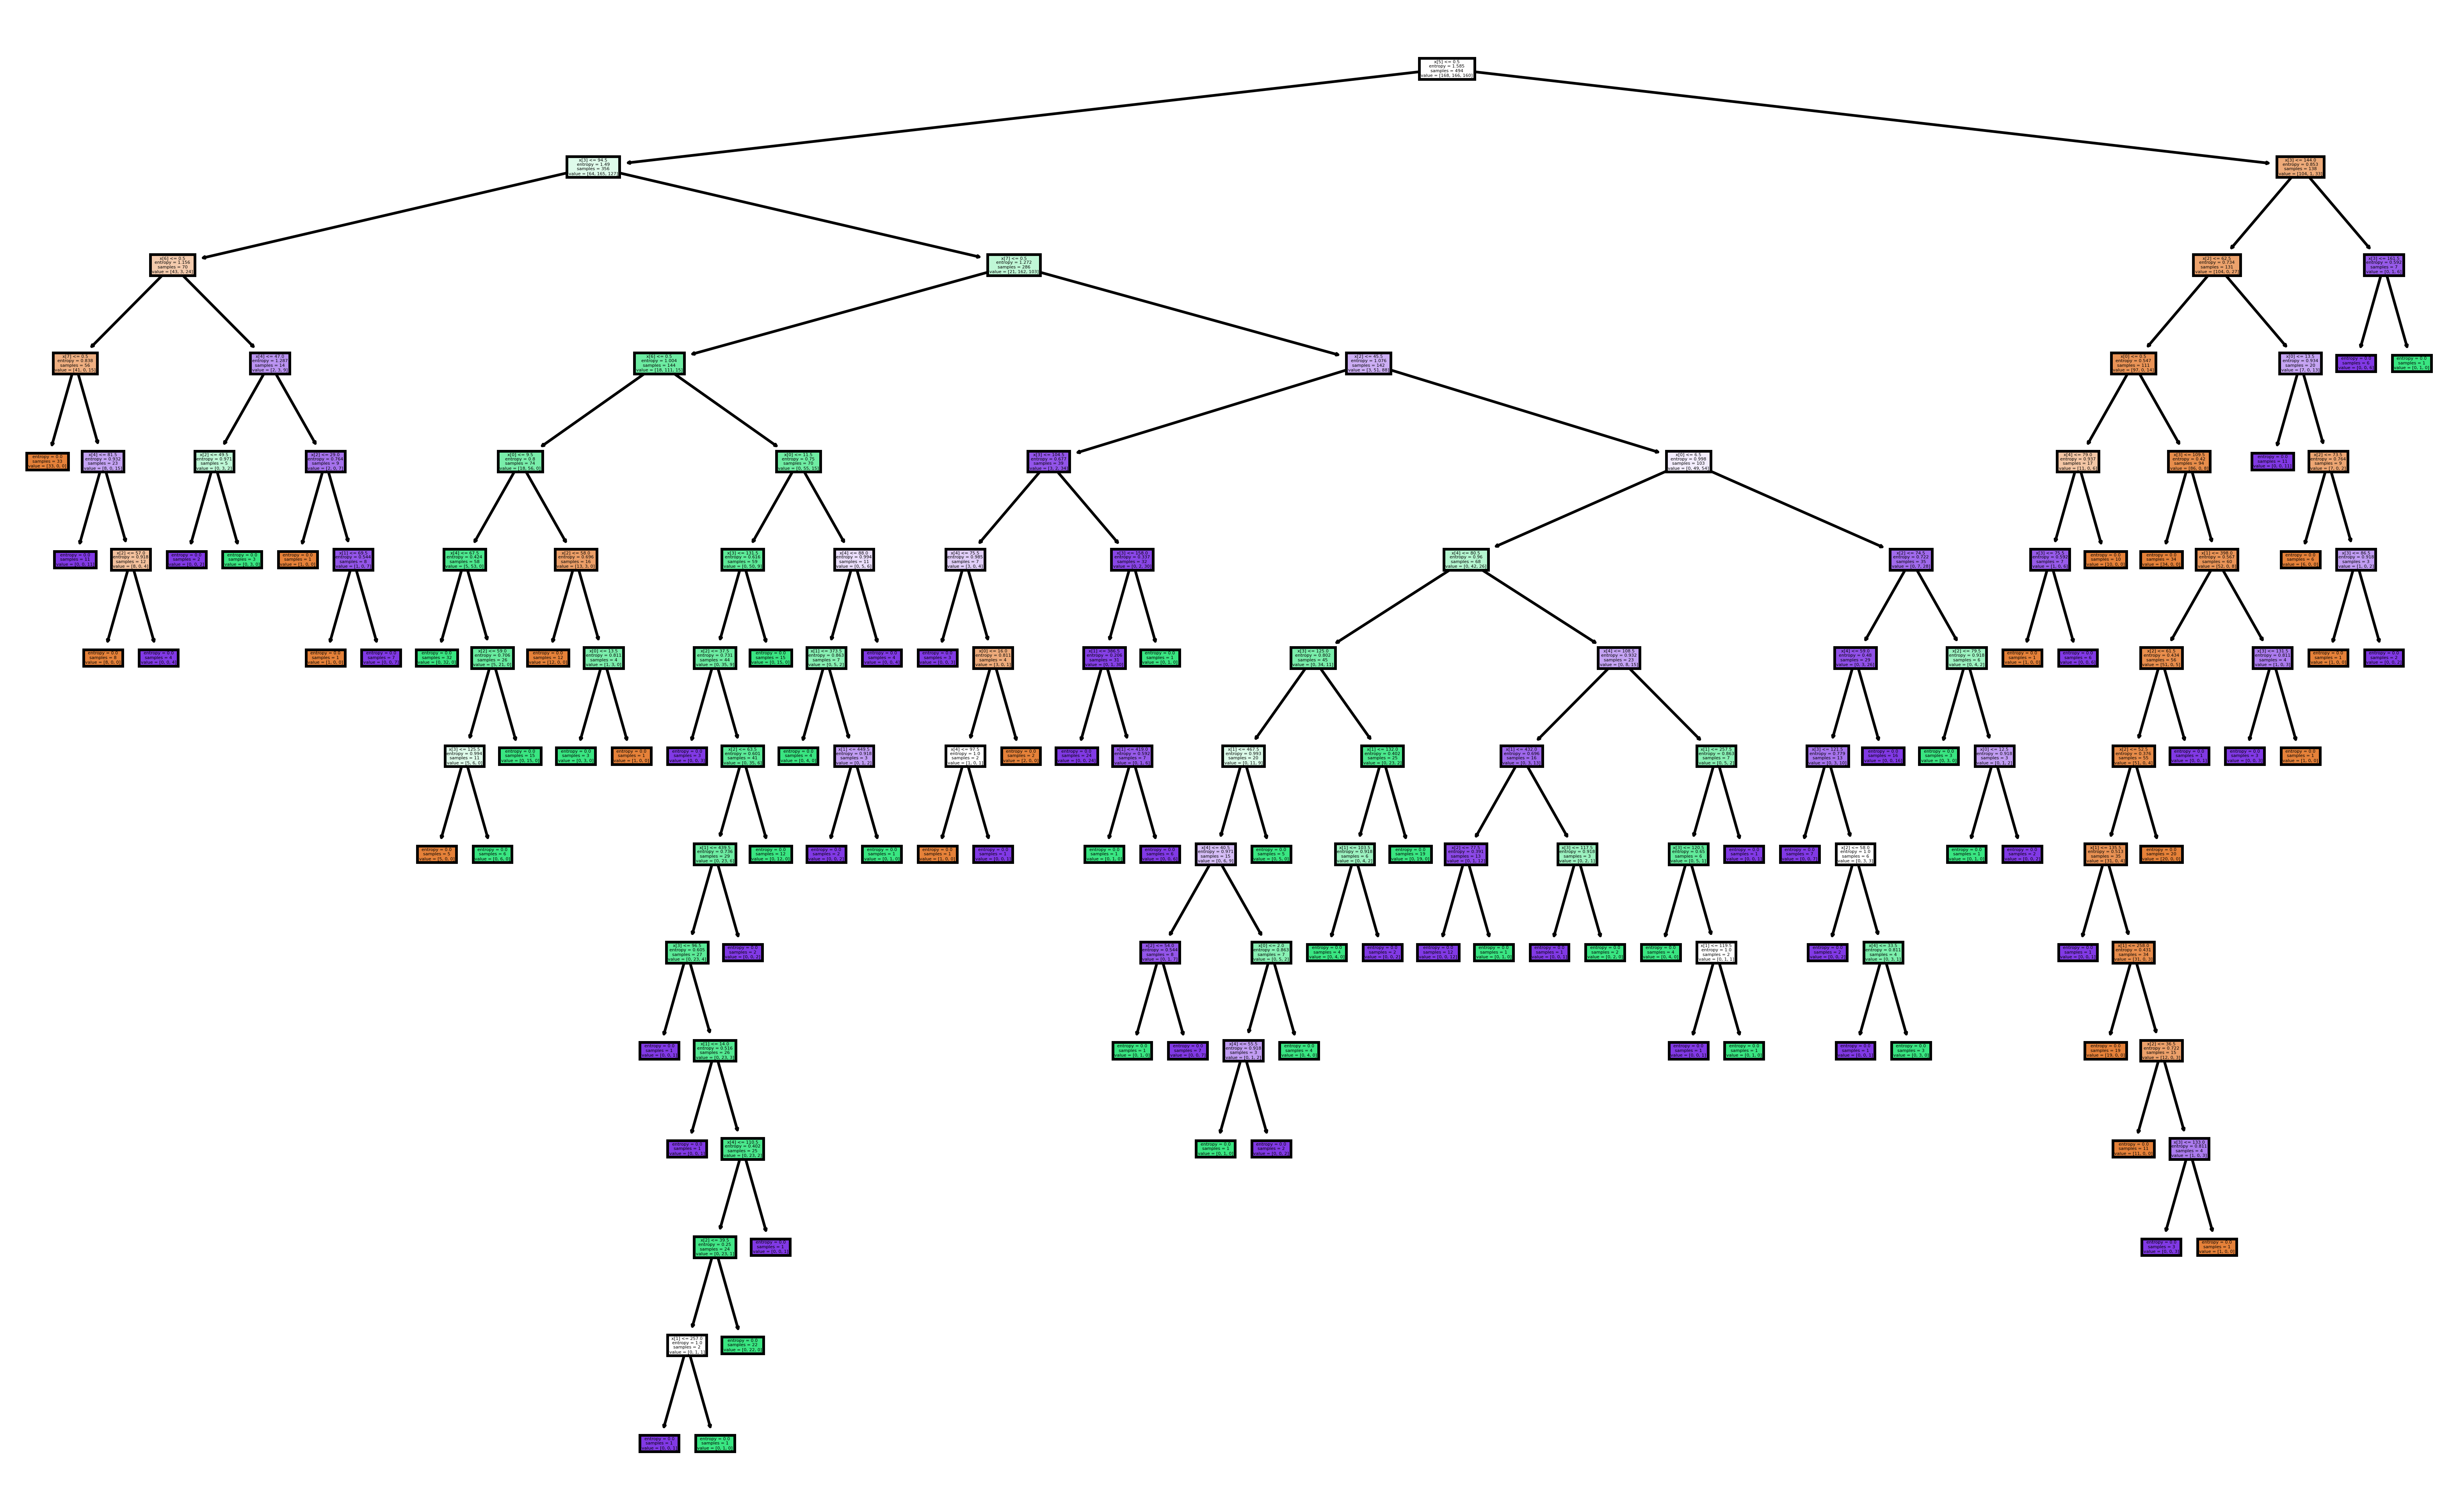

In [45]:
plt.figure(figsize=(16,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [46]:
preds = model_entropy.predict(x_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        72
           1       0.79      0.80      0.80        71
           2       0.67      0.72      0.69        69

    accuracy                           0.76       212
   macro avg       0.77      0.76      0.76       212
weighted avg       0.77      0.76      0.77       212



**2) Building Decision Tree Classifier using Gini Criteria post Pruning**

In [47]:
model_gini = dtc(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

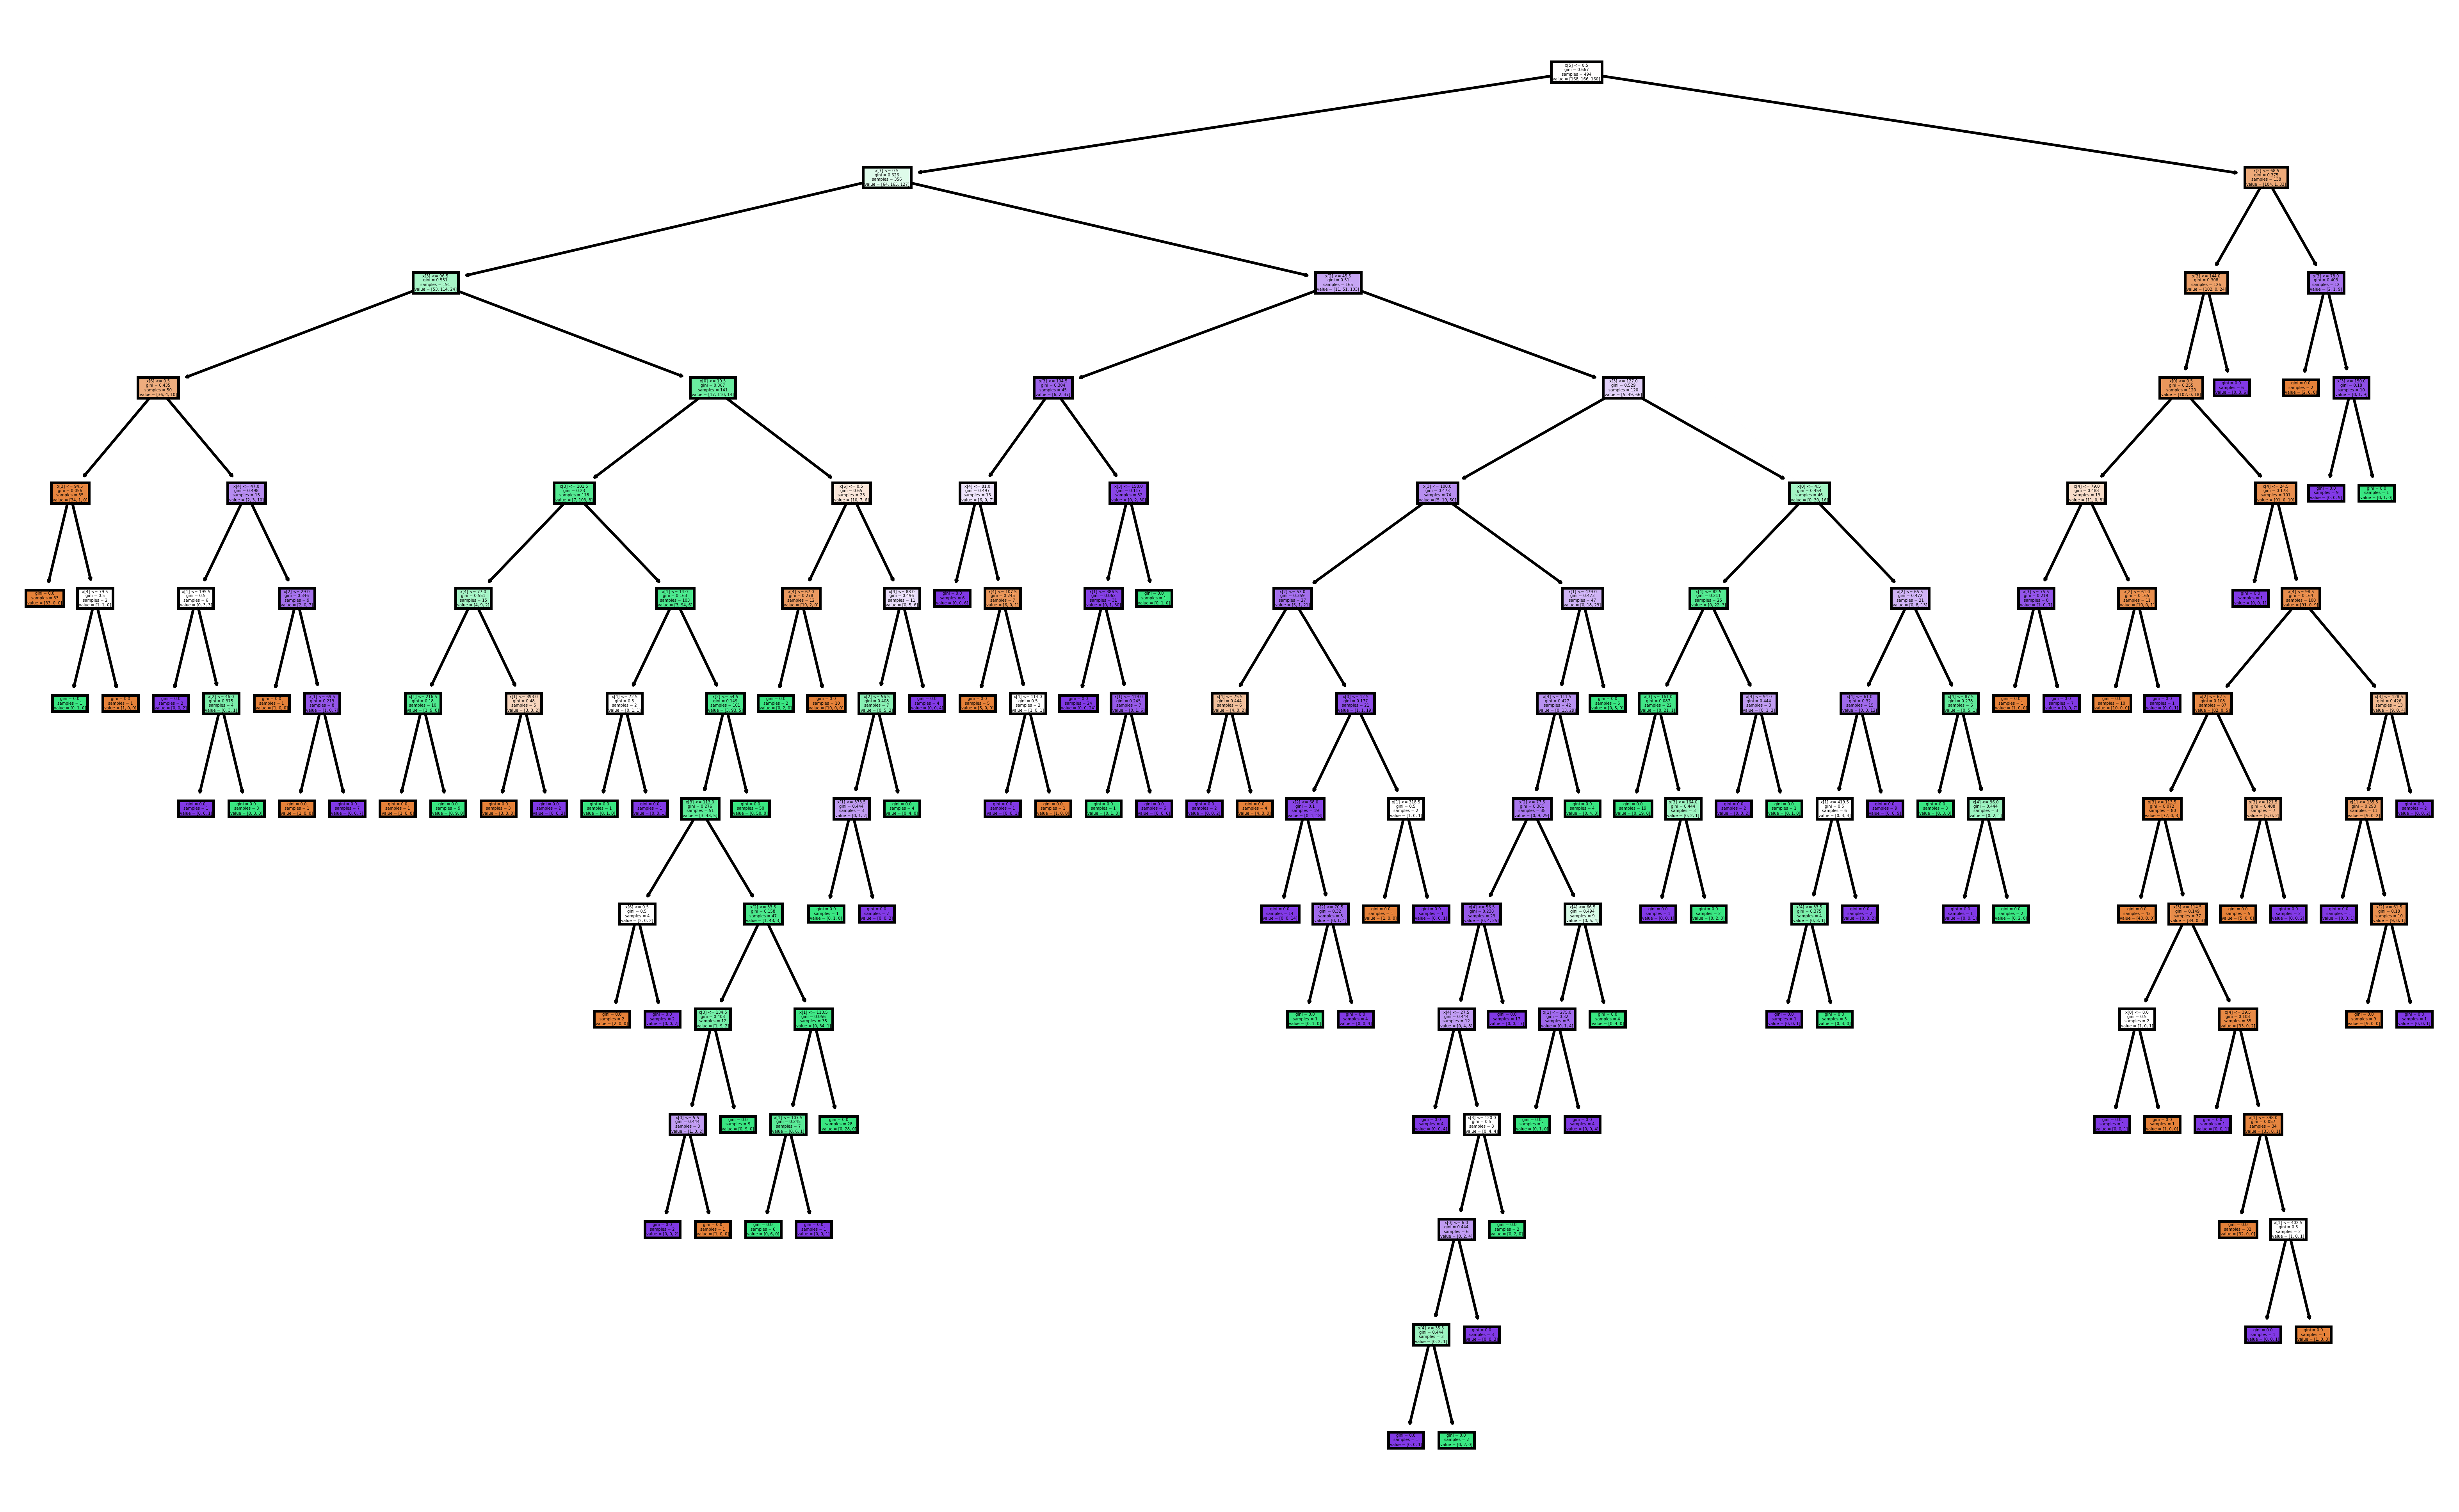

In [48]:
plt.figure(figsize=(16,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [49]:
preds = model_gini.predict(x_test)
print(classification_report(y_test,preds))  

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        72
           1       0.79      0.85      0.82        71
           2       0.69      0.68      0.69        69

    accuracy                           0.77       212
   macro avg       0.77      0.77      0.77       212
weighted avg       0.77      0.77      0.77       212



#Conclusion

Out of both the model results, Gini Model Hybridization technique gave the best results with accuracy & other parameter scores was found to be better.

**Hence, Gini Model can be considered.**